# Downloading streamflow and weather data using APIs
---

**Objectives:**

By the end of this exercise, you should be able to:
* get streamflow and weather data from two APIs (Application Programming Interface), namely the USGS web platform and NOAA's bulk data interface 
* automate both processes using python packages (i.e., `hydrofunctions` and `meteostat`)
* plot streamflow and precipitation time series
* correlate the streamflow and precipitation data

---

In this exercise, we will use Lake Raleigh as our study case. We will leverage the [hydrofunctions](https://hydrofunctions.readthedocs.io/en/latest/authors.html) python package to access the streamflow time series from USGS gauging stations—using a python (or R package) is the most convenient way to retrieve streamflow information from multiple USGS stations. In addition, we will use the [meteostat](https://dev.meteostat.net/python/) python library to access weather data from NOAA meteorological stations.

#### What is an API and how does it work?

Application Programming Interface can be thought of as a service between two applications. For example, the application sending a request (i.e., client or user), and the application sending the response to the request (i.e., the USGS web platform or NOAA's bulk data interface).

Check out this video [below]("https://youtu.be/s7wmiS2mSXY").

<a href="https://youtu.be/s7wmiS2mSXY">
<p align="center">
    <img src='imgs/api.png' width='600' /> 
</p>

##### Installing the necessary packages

Open your anaconda prompt, activate your NR491 environment and run:

$ pip install hydrofunctions  

$ pip install meteostat 

Make sure the Kernel (in the upper right hand side corner) is changed to your NR491 environment

#### Downloading streamflow time series

In [37]:
import hydrofunctions as hf
import matplotlib.pyplot as plt
%matplotlib inline

We will retrieve streamflow time series between **01-01-2021** and **01-01-2022** for the USGS station closest to Lake Raleigh. To do so, we first need to get the station/site number ("**site_no**") from the National Water Dashboard [here](https://dashboard.waterdata.usgs.gov/app/nwd/?region=lower48&aoi=default). Basically, zoom in to Lake Raleigh, and click or hover your mouse on the closest station. Then, get the 10 digits USGS station number. 

What site number did you pick?

The second step is to define the type of "**service**" that we will request from the API. It can either be "iv" (instantaneous values) or "dv" (default, daily mean values). In our case, we want the daily mean values. Lastly, we will define the start_date ("**st_date**") and end_date ("**end_date**").

Please make sure you read through the hydrofunctions package [documentation](https://hydrofunctions.readthedocs.io/en/latest/notebooks/Writing_Valid_Requests_for_NWIS.html). 

In [38]:
# general objects
site_no = '0208734210' # add the site_no here (0208734210)
service = 'dv'
st_date, end_date = '2021-01-01', '2022-01-01'

# flow in ft3/s
daily_mean = hf.NWIS(site=site_no, service=service, start_date=st_date, end_date=end_date)
# What are the properties of the dataset? You can see below that there are two types of data being collected at our site
daily_mean

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=0208734210&startDT=2021-01-01&endDT=2022-01-01


USGS:0208734210: WALNUT CREEK AT TRAILWOOD DRIVE AT RALEIGH, NC
    00060: <Day>  Discharge, cubic feet per second 
    00065: <Day>  Gage height, feet 
Start: 2021-01-01 00:00:00+00:00
End:   2022-01-01 00:00:00+00:00

How can we have a look at the data? What type of object is `daily_mean`?

In [39]:
type(daily_mean)

hydrofunctions.station.NWIS

In [40]:
# this is what the data look like in table form, what do you think these columns are?
daily_mean.df()
daily_mean.df().head()

,USGS:0208734210:00060:00003,USGS:0208734210:00060:00003_qualifiers,USGS:0208734210:00065:00003,USGS:0208734210:00065:00003_qualifiers
datetimeUTC,,,,
2021-01-01 00:00:00+00:00,43.9,A,5.31,A
2021-01-02 00:00:00+00:00,49.5,A,5.39,A
2021-01-03 00:00:00+00:00,175.0,A,7.08,A
2021-01-04 00:00:00+00:00,35.1,A,5.13,A
2021-01-05 00:00:00+00:00,17.5,A,4.71,A


Go to the [documentation](https://hydrofunctions.readthedocs.io/en/latest/notebooks/viewing.html) and try to find out what the 
different columns represent. How can we list the columns separately?






We have 2 different columns containing data. Each column has a twin ‘qualifiers’ column, which contains metadata flags.
‘P’ flags indicate “Provisional” data; “Approved” (‘A’) indicate official data.


In [41]:
# list the columns separately
daily_mean.df().columns

Index(['USGS:0208734210:00060:00003', 'USGS:0208734210:00060:00003_qualifiers',
       'USGS:0208734210:00065:00003',
       'USGS:0208734210:00065:00003_qualifiers'],
      dtype='object')

In [42]:
# It is possible to limit your view to only one parameter by entering the five digit parameter number, 
# such as ‘00065’ for stage. Some common parameters have an alias, such as ‘q’ and ‘discharge’ for ‘00060’. 
# Since discharge is what we are interested in, we will have a look at that:
daily_mean.df('q').head()

,USGS:0208734210:00060:00003
datetimeUTC,
2021-01-01 00:00:00+00:00,43.9
2021-01-02 00:00:00+00:00,49.5
2021-01-03 00:00:00+00:00,175.0
2021-01-04 00:00:00+00:00,35.1
2021-01-05 00:00:00+00:00,17.5


In [44]:
daily_mean_values = daily_mean.df('q')
daily_mean_values

# save data after creating a folder called 'results' in your Week5_API_DataLecture folder
os.makedirs('./results', exist_ok=True)

daily_mean_values.to_csv('results/daily_mean_values.csv')

daily_mean_values.head()

,USGS:0208734210:00060:00003
datetimeUTC,
2021-01-01 00:00:00+00:00,43.9
2021-01-02 00:00:00+00:00,49.5
2021-01-03 00:00:00+00:00,175.0
2021-01-04 00:00:00+00:00,35.1
2021-01-05 00:00:00+00:00,17.5


<AxesSubplot:xlabel='datetimeUTC'>

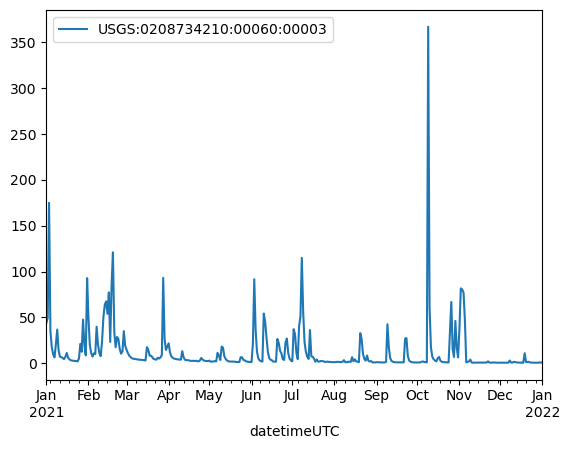

In [45]:
# we can plot it directly
daily_mean.df('discharge').plot()

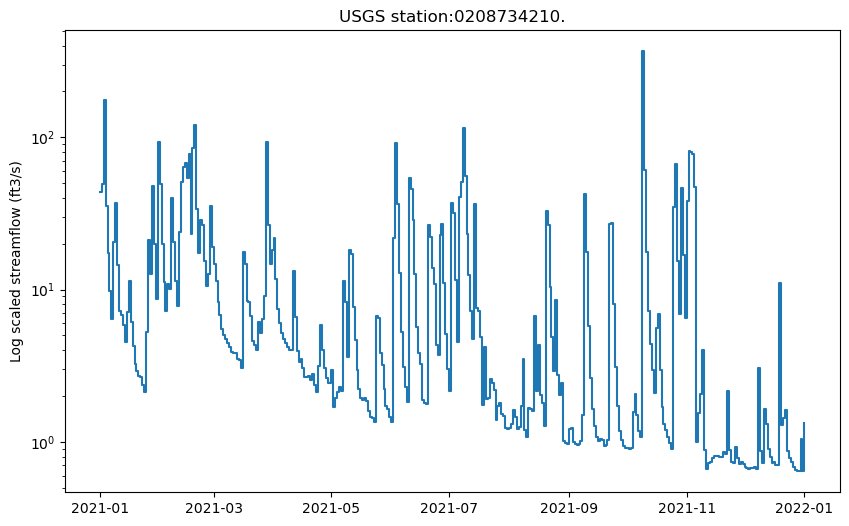

In [46]:
# plot the streamflow time series
fig, ax = plt.subplots(figsize=(10, 6))
ax.step(daily_mean_values.loc[st_date:end_date].index.values, daily_mean_values.loc[st_date:end_date].values, where='post')
plt.yscale('log') # plotting with a log scale
plt.ylabel('Log scaled streamflow (ft3/s)')
plt.title(f'USGS station:{site_no}.')
plt.show()

What do you notice in this graph? Describe the pattern in discharge at this station. What do you think plotting it 
on a log scale does?

#### Downloading weather variables time series

In [47]:
from datetime import datetime
from meteostat import Point, Daily

Using the [meteostat](https://dev.meteostat.net/python/) python library, we can access open weather and climate information (see data sources [here](https://dev.meteostat.net/sources.html)), for instance, from [NOAA's](https://www.weather.gov/) API. 

Q: What organizations is `meteosat` able to download data from?

The package allows us to have access to raw observations of individual weather stations, or use a **point data** to query data by geographic location. For a complete list of climate variables and their units, please have a look [here](https://dev.meteostat.net/formats.html#meteorological-parameters).

Q: How many meteorological parameters is `meteosat` providing data for?

Point data is available for almost all geographic locations. It only returns data if there is at least one nearby weather station. For further details, please have a look [here](https://dev.meteostat.net/python/point.html#example). What is `point` data?

To get data for a specific point, you first need the point's Latitude and Longitude, which can be retrieved using this [website](https://www.latlong.net/).
 
Q: What lat & long did you come up with for Lake Raleigh?

An example of how to request data is available [here](https://dev.meteostat.net/python/#example)
the package uses datetime format dates! Have a look at the example for Vancouver. 

Describe how this is done.

In [48]:
st_date, end_date = datetime(2021,1,1), datetime(2022,1,1)
st_date

datetime.datetime(2021, 1, 1, 0, 0)

In [50]:
# Create Point for Lake Raleigh
# add Lake Raleigh's lat and long here! 
# It must be a number, for instance, 35.773209, -78.681557
lat, long = 35.773209, -78.681557 # <-- add lat and long here.
lake_raleigh = Point(lat,long)

In [51]:
type(lake_raleigh)

meteostat.interface.point.Point

Q: What type of object is `lake_raleigh`?

In [53]:
# Get daily data between Jan 2021 and Jan 2022
weather_data = Daily(lake_raleigh, st_date, end_date)
weather_data = weather_data.fetch()

In [54]:
# save your data in the results folder created before
weather_data.to_csv('results/weather_data.csv')

Have a look at the data? what columns do we have?

In [55]:
weather_data.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2021-01-01,8.1,5.0,12.8,16.5,0.0,56.0,12.6,NaN,1024.4,NaN
2021-01-02,8.1,5.6,13.9,15.2,0.0,313.0,5.0,NaN,1016.4,NaN
2021-01-03,10.7,6.7,12.8,23.6,0.0,4.0,5.0,NaN,1013.1,NaN
2021-01-04,6.4,1.1,9.4,0.0,0.0,352.0,1.8,NaN,1016.4,NaN
2021-01-05,2.8,-1.6,8.9,0.0,0.0,341.0,2.2,NaN,1014.1,NaN


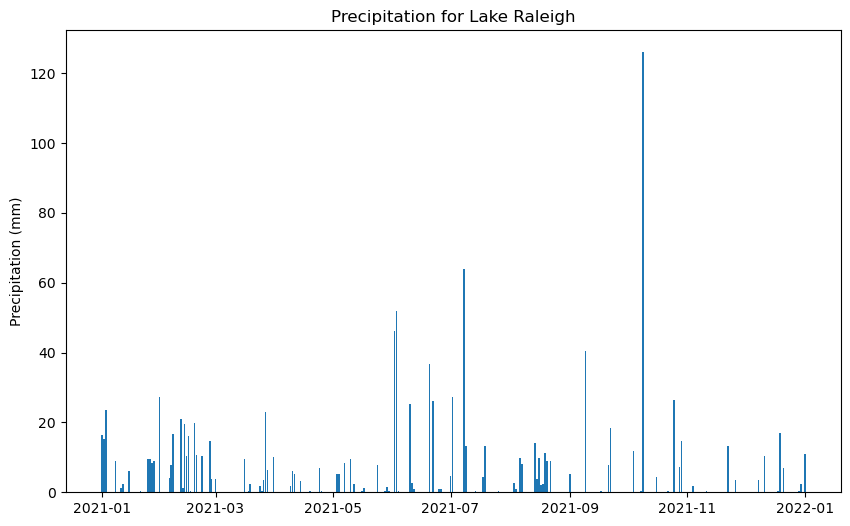

In [56]:
# plot our precipitation
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(weather_data.loc[st_date:end_date].index.values, weather_data.loc[st_date:end_date]['prcp'].values)
plt.ylabel('Precipitation (mm)')
plt.title(f'Precipitation for Lake Raleigh')
plt.show()

#### Correlation between streamflow and precipitation

We can calculate Pearson's correlation using the covariance of streamflow and precipitation, divided by the product of their standard deviation.

Pearson's correlation coefficient = covariance(streamflow, precipitation) / (stdv(streamflow) * stdv(precipitation))

Or we can simply use numpy's function **np.corrcoef()**, for further details check the function's [documentation](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html).
Let's have a look at the documentation, how does this function work?

In [57]:
import numpy as np

In [59]:
# Have a look at the streamflow csv, what does it contain?
streamflow = daily_mean_values.iloc[:,0].values
# Q: What does  
streamflow

array([ 43.9 ,  49.5 , 175.  ,  35.1 ,  17.5 ,   9.79,   6.39,  20.5 ,
        36.8 ,  14.4 ,   7.18,   6.77,   5.81,   4.51,   7.09,  11.3 ,
         6.13,   4.27,   3.25,   2.93,   2.7 ,   2.65,   2.37,   2.12,
         5.23,  21.2 ,  12.6 ,  47.7 ,  19.9 ,   8.65,  92.9 ,  49.  ,
        19.9 ,  11.2 ,   7.28,  10.9 ,  10.1 ,  39.9 ,  20.4 ,  11.3 ,
         7.78,  24.  ,  50.5 ,  63.8 ,  67.6 ,  53.9 ,  77.3 ,  23.3 ,
        85.1 , 121.  ,  34.  ,  17.5 ,  28.7 ,  26.6 ,  15.5 ,  10.5 ,
        12.7 ,  35.1 ,  19.1 ,  14.8 ,  11.3 ,   8.31,   6.79,   5.48,
         4.99,   4.74,   4.43,   4.2 ,   3.91,   3.81,   3.8 ,   3.51,
         3.42,   3.05,  17.6 ,  14.7 ,   8.36,   8.34,   6.67,   4.62,
         4.3 ,   4.  ,   6.08,   5.19,   6.43,   9.09,  93.2 ,  26.7 ,
        14.6 ,  18.3 ,  21.8 ,  11.7 ,   7.5 ,   6.04,   5.15,   4.76,
         4.43,   4.18,   4.02,   3.99,  13.3 ,   6.62,   3.92,   3.36,
         3.52,   3.04,   2.67,   2.68,   2.71,   2.53,   2.79,   2.37,
      

Q: Explain what the line below does. How else might we be able to read in the `prcp` data? 
Hint: have a look at your vector data exercise.

In [60]:
precip = weather_data['prcp'].values
precip

array([ 16.5,  15.2,  23.6,   0. ,   0. ,   0. ,   0. ,   8.9,   0. ,
         0. ,   1.3,   2.3,   0. ,   0. ,   6.1,   0. ,   0. ,   0. ,
         0. ,   0. ,   0.3,   0. ,   0. ,   0. ,   9.4,   9.4,   8.4,
         9.1,   0. ,   0. ,  27.2,   0. ,   0. ,   0. ,   0. ,   4.1,
         7.9,  16.8,   0. ,   0. ,   0. ,  21.1,   1.3,  19.6,  10.4,
        16. ,   0.3,   0. ,  19.8,  10.7,   0. ,   0. ,  10.4,   0. ,
         0. ,   0. ,  14.7,   3.8,   0. ,   3.8,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   9.4,   0. ,   0.5,   2.5,   0. ,   0. ,   0. ,
         0. ,   1.8,   0.5,   3.6,  23.1,   6.4,   0. ,   0. ,  10.2,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   1.8,
         6.1,   5.1,   0. ,   0. ,   3.3,   0. ,   0. ,   0. ,   0. ,
         0.3,   0. ,   0. ,   0. ,   0. ,   6.9,   0.5,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   5.1,   5.1,   0. ,   0. ,
         8.4,   0. ,

In [61]:
# Let's do the correlation:
p_corr = np.corrcoef(streamflow, precip)

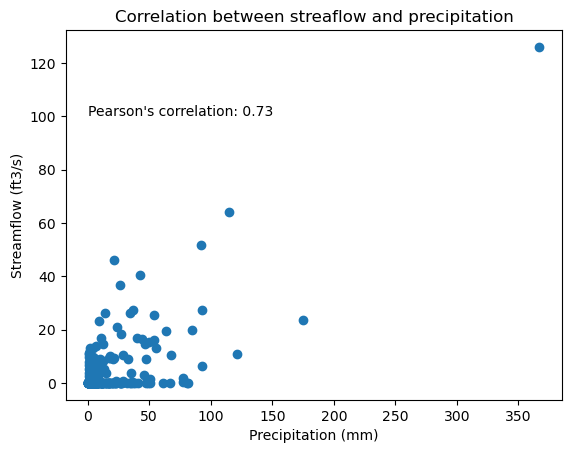

In [62]:
# let's plot

plt.scatter(streamflow, precip)
plt.text(0,100,f"Pearson's correlation: {np.round(p_corr[1, 0],2)}")
plt.ylabel('Streamflow (ft3/s)')
plt.xlabel('Precipitation (mm)')
plt.title(f'Correlation between streaflow and precipitation')
plt.show()

Q: How would you describe the correlation between discharge and precipitation for Lake Raleigh? Does it make sense? Why? Why not?
What else might you want to consider?